This exercise will require you to pull some data from the Qunadl API. Qaundl is currently the most widely used aggregator of financial market data.

As a first step, you will need to register a free account on the http://www.quandl.com website.

After you register, you will be provided with a unique API key, that you should store:

In [1]:
# Store the API key as a string - according to PEP8, constants are always named in all upper case
API_KEY = ''

Qaundl has a large number of data sources, but, unfortunately, most of them require a Premium subscription. Still, there are also a good number of free datasets.

For this mini project, we will focus on equities data from the Frankfurt Stock Exhange (FSE), which is available for free. We'll try and analyze the stock prices of a company called Carl Zeiss Meditec, which manufactures tools for eye examinations, as well as medical lasers for laser eye surgery: https://www.zeiss.com/meditec/int/home.html. The company is listed under the stock ticker AFX_X.

You can find the detailed Quandl API instructions here: https://docs.quandl.com/docs/time-series

While there is a dedicated Python package for connecting to the Quandl API, we would prefer that you use the *requests* package, which can be easily downloaded using *pip* or *conda*. You can find the documentation for the package here: http://docs.python-requests.org/en/master/ 

Finally, apart from the *requests* package, you are encouraged to not use any third party Python packages, such as *pandas*, and instead focus on what's available in the Python Standard Library (the *collections* module might come in handy: https://pymotw.com/3/collections/).
Also, since you won't have access to DataFrames, you are encouraged to us Python's native data structures - preferably dictionaries, though some questions can also be answered using lists.
You can read more on these data structures here: https://docs.python.org/3/tutorial/datastructures.html

Keep in mind that the JSON responses you will be getting from the API map almost one-to-one to Python's dictionaries. Unfortunately, they can be very nested, so make sure you read up on indexing dictionaries in the documentation provided above.

In [2]:
# First, import the relevant modules
import json
import requests
import collections
import pandas as pd
from collections import defaultdict
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

In [3]:
# Now, call the Quandl API and pull out a small sample of the data (only one day) to get a glimpse
# into the JSON structure that will be returned
test_data=requests.get("https://www.quandl.com/api/v3/datasets/FSE/AFX_X?start_date=2018-12-5&end_date=2018-12-5&api_key=" + API_KEY)

In [4]:
# Inspect the JSON structure of the object you created, and take note of how nested it is,
# as well as the overall structure

# Check data type
type(test_data.json())

dict

In [5]:
# Check dictionary keys
test_data.json().keys()

[u'dataset']

In [6]:
# Check the text content of dictionary
test_data.text

u'{"dataset":{"id":10095370,"dataset_code":"AFX_X","database_code":"FSE","name":"Carl Zeiss Meditec (AFX_X)","description":"Stock Prices for Carl Zeiss Meditec (AFX) from the Frankfurt Stock Exchange.\\u003cbr\\u003e\\u003cbr\\u003eTrading System: Xetra\\u003cbr\\u003e\\u003cbr\\u003eISIN: DE0005313704","refreshed_at":"2019-01-07T22:33:25.175Z","newest_available_date":"2019-01-07","oldest_available_date":"2000-06-07","column_names":["Date","Open","High","Low","Close","Change","Traded Volume","Turnover","Last Price of the Day","Daily Traded Units","Daily Turnover"],"frequency":"daily","type":"Time Series","premium":false,"limit":null,"transform":null,"column_index":null,"start_date":"2018-12-05","end_date":"2018-12-05","data":[["2018-12-05",null,68.5,66.45,66.45,null,null,null,null,null,null]],"collapse":null,"order":null,"database_id":6129}}'

In [7]:
# Check the type of 'dataset' from test_data
type(test_data.json()['dataset'])

dict

In [8]:
# Check the 'dataset' keys
test_data.json()['dataset'].keys()

[u'dataset_code',
 u'column_names',
 u'newest_available_date',
 u'description',
 u'end_date',
 u'data',
 u'start_date',
 u'limit',
 u'transform',
 u'order',
 u'refreshed_at',
 u'frequency',
 u'database_code',
 u'oldest_available_date',
 u'collapse',
 u'premium',
 u'database_id',
 u'column_index',
 u'type',
 u'id',
 u'name']

In [9]:
# Check column names from 'dataset'
test_data.json()['dataset']['column_names']

[u'Date',
 u'Open',
 u'High',
 u'Low',
 u'Close',
 u'Change',
 u'Traded Volume',
 u'Turnover',
 u'Last Price of the Day',
 u'Daily Traded Units',
 u'Daily Turnover']

In [10]:
# Check the 'data' values from 'dataset'
test_data.json()['dataset']['data']

[[u'2018-12-05', None, 68.5, 66.45, 66.45, None, None, None, None, None, None]]

These are your tasks for this mini project:

1. Collect data from the Franfurt Stock Exchange, for the ticker AFX_X, for the whole year 2017 (keep in mind that the date format is YYYY-MM-DD).
2. Convert the returned JSON object into a Python dictionary.
3. Calculate what the highest and lowest opening prices were for the stock in this period.
4. What was the largest change in any one day (based on High and Low price)?
5. What was the largest change between any two days (based on Closing Price)?
6. What was the average daily trading volume during this year?
7. (Optional) What was the median trading volume during this year. (Note: you may need to implement your own function for calculating the median.)

## 1. Collect data from the Franfurt Stock Exchange, for the ticker AFX_X, for the whole year 2017 (keep in mind that the date format is YYYY-MM-DD).

In [11]:
data=requests.get("https://www.quandl.com/api/v3/datasets/FSE/AFX_X?start_date=2017-01-01&end_date=2017-12-31&api_key=" + API_KEY)

## 2. Convert the returned JSON object into a Python dictionary.

In [12]:
# Load json sting into data_dict dictionary
data_dict = json.loads(data.text)

In [13]:
# Create two lists from the nested data_dict dictionary
values=data_dict['dataset']['data']
column_names=data_dict['dataset']['column_names']

# Create new collection stock_info that maps column names with corresponding values
stock_info = defaultdict()
stock_info = [collections.OrderedDict(zip(column_names,values[i])) for i in range(len(values))]

## 3. Calculate what the highest and lowest opening prices were for the stock in this period.

In [14]:
open_price=[stock_info[i]['Open'] for i in range(len(stock_info)) if stock_info[i]['Open'] != None]
date=[stock_info[i]['Date'] for i in range(len(stock_info)) if stock_info[i]['Open'] != None]

min_open=min(open_price)
max_open=max(open_price)

date_min_index=open_price.index(min_open)
date_max_index=open_price.index(max_open)

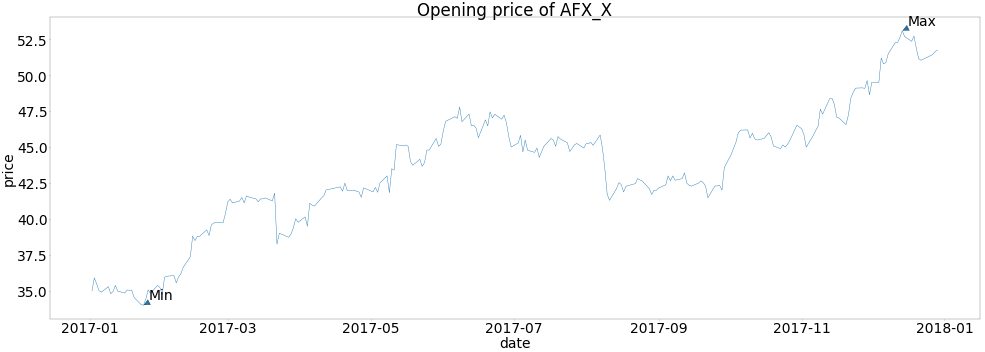

In [15]:
#Plot data

plt.rcParams['font.size'] = 50
fig=plt.figure(figsize=(60, 20), dpi= 20)

df=pd.DataFrame({'open':open_price, 'date':date})

df.date = pd.to_datetime(df['date'], format='%Y-%m-%d')
df.set_index(['date'],inplace=True)

datetime_object_min = datetime.strptime(date[date_min_index], '%Y-%m-%d')
price_min = min_open

datetime_object_max = datetime.strptime(date[date_max_index], '%Y-%m-%d')
price_max = max_open

x = [datetime_object_min, datetime_object_max] 
y = [price_min, price_max]

plt.plot(df.index, df.open)

plt.annotate('Min', (mdates.date2num(x[0]), y[0]), xytext=(20, 20), 
            textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))

plt.annotate('Max', (mdates.date2num(x[1]), y[1]), xytext=(20, 20), 
            textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))


plt.ylabel('price')
plt.xlabel('date')
plt.title('Opening price of AFX_X')
plt.show()

In [16]:
print('Lowest opening price was : ' + str(min_open) + ' on ' + date[date_min_index])
print('Highest opening price was : ' + str(max_open) + ' on ' + date[date_max_index])

Lowest opening price was : 34.0 on 2017-01-24
Highest opening price was : 53.11 on 2017-12-14


## 4. What was the largest change in any one day (based on High and Low price)?

In [17]:
high_low_diff=[stock_info[i]['High'] - stock_info[i]['Low'] for i in range(len(stock_info))]
max_diff=max(high_low_diff)
data_max_diff_index=high_low_diff.index(max_diff)

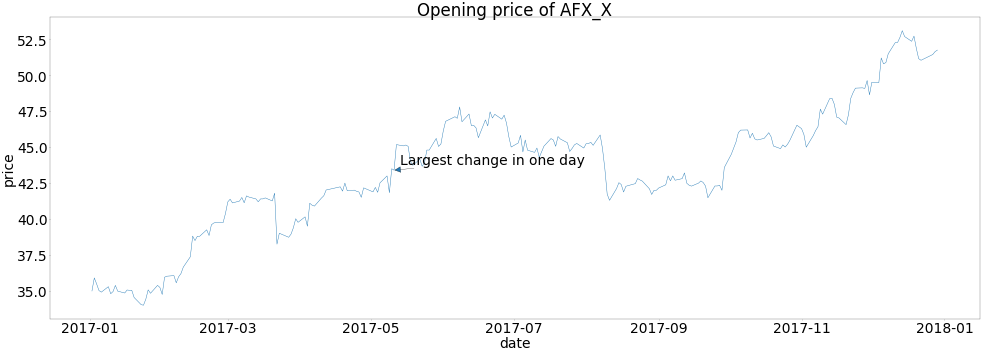

In [18]:
# Plot Data

fig=plt.figure(figsize=(60, 20), dpi= 20)

datetime_object_max_diff = datetime.strptime(date[data_max_diff_index], '%Y-%m-%d')
price_max_diff = open_price[data_max_diff_index]

x = datetime_object_max_diff 
y = price_max_diff

plt.plot(df.index, df.open)

plt.annotate('Largest change in one day', (mdates.date2num(x), y), xytext=(20, 20), 
            textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))

plt.ylabel('price')
plt.xlabel('date')
plt.title('Opening price of AFX_X')
plt.show()

In [19]:
print ('The largest change in one day was : ' + str(max_diff) + ' on ' + date[data_max_diff_index])

The largest change in one day was : 2.81 on 2017-05-11


## 5. What was the largest change between any two days (based on Closing Price)?

In [20]:
high_close_diff=[stock_info[i+1]['Close'] - stock_info[i]['Close'] for i in range(len(stock_info)-1)]
max_close_diff=max(high_close_diff)
data_max_close_diff_index=high_close_diff.index(max_close_diff)

In [21]:
print ('The largest change between any two days was : ' + str(max_close_diff) + ' between ' + date[data_max_close_diff_index+1] + ' and ' + date[data_max_close_diff_index])

The largest change between any two days was : 2.56 between 2017-08-08 and 2017-08-09


## 6. What was the average daily trading volume during this year?

In [22]:
import numpy as np
average_trading_volume=[stock_info[i]['Traded Volume'] for i in range(len(stock_info))]
average_value=np.mean(average_trading_volume)

In [23]:
print ('The average daily traiding volume during 2017 year was : ' + str(average_value)) 

The average daily traiding volume during 2017 year was : 89124.33725490196


## 7. (Optional) What was the median trading volume during this year. (Note: you may need to implement your own function for calculating the median.)

In [24]:
np.median(average_trading_volume)

76286.0